[[2013   21   49   47   29]
 [2012   21   50   43   26]
 [2011   17   48   37   19]
 [2010   20   37   34   11]
 [2009   19   38   30    6]
 [2008   21   40   28    4]
 [2007   20   39   23    3]
 [2006   19   30   17    2]
 [2005   21   27   13    1]
 [2004   21   25   10    0]
 [2003   20   18    9    0]
 [2002   23   15    5    0]
 [2001   23   10    5    0]
 [2000   24    7    4    0]
 [1999   21    5    3    0]
 [1998   19    4    3    0]
 [1997   19    3    2    0]
 [1996   18    2    2    0]
 [1995   21    1    2    0]
 [1994   20    0    1    0]
 [1993   19    0    1    0]
 [1992   18    0    1    0]
 [1991   15    0    1    0]
 [1990   17    0    1    0]]


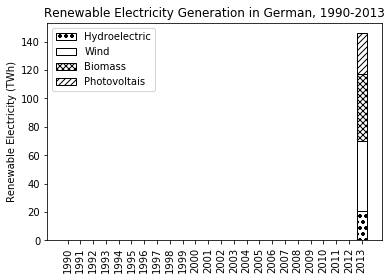

In [4]:
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url='https://scipython.com/static/media/examples/E7/germany-energy-sources.txt'
file = urlopen(url)
data = np.loadtxt(file, skiprows=2, dtype='i4')

# print(data)
years = data[:,0]
n = len(years)

#GWh to TWh
data[:,1:] = data[:,1:]/1000
# print(data)

# fig=plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig=plt.figure()
ax=fig.add_subplot(111)
sources=('Hydroelectric','Wind','Biomass','Photovoltais')
hatch=['oo','','xxxx','////']
bottom = np.zeros(n)
bars=[None]*n
for i, source in enumerate(sources):
    bars[i]=ax.bar(years, bottom=bottom, height=data[:,i+1], color='w', edgecolor ='k',
                   hatch=hatch[i], align='center')
    bottom += data[:,i+1]

ax.set_xticks(years)
plt.xticks(rotation = 90)
# ax.set_xlim(years[-1]-1, years[0]+1)
# ax.set_ylim(0, 170)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in German, {}-{}'.format(years[-1],years[0]))
plt.legend(bars, sources, loc='best')
plt.show()

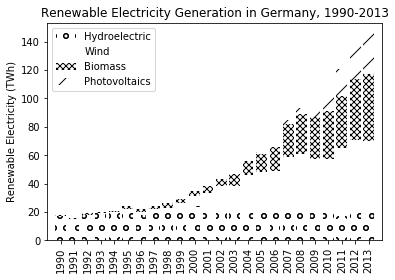

In [6]:
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url='https://scipython.com/static/media/examples/E7/germany-energy-sources.txt'
file = urlopen(url)
data = np.loadtxt(file, skiprows=2, dtype='i4')

years = data[:,0]
n = len(years)

# GWh to TWh
data[:,1:] = data[:,1:]/ 1000

fig = plt.figure()
ax = fig.add_subplot(111)
sources = ('Hydroelectric', 'Wind', 'Biomass', 'Photovoltaics')
hatch = ['o', '', 'xxxx', '/']
bottom = np.zeros(n)
bars = [None]*n
for i, source in enumerate(sources):
    bars[i] = ax.bar(years, bottom=bottom, height=data[:,i+1], color='w', edgec
                    hatch=hatch[i], align='center')
    bottom += data[:,i+1]

ax.set_xticks(years)
plt.xticks(rotation=90)
ax.set_xlim(1989, 2014)
ax.set_ylabel('Renewable Electricity (TWh)')
ax.set_title('Renewable Electricity Generation in Germany, 1990-2013')
plt.legend(bars, sources, loc='best')
plt.show()